# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# read csv to dataframe

In [3]:
filepath = "../data/raw/refined.csv"

In [4]:
df = pd.read_csv(filepath)

In [5]:
df['index'] = df.index

In [6]:
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.lower() for x in df.columns]

In [7]:
df['comment_content'] = df['comment_content'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))
#df = df[df.comment_content.map(lambda x: x.isascii())]

In [8]:
df.head()

,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know,index
0,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",5,Best Among the Budget-friendly Hotels in SG,I love this hotel! Its in a quiet and peaceful...,Date of stay: July 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']",0
1,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",4,Good Location for Travel around Singapore Center,"Convenience near MRT Station and Bus Stops, Le...",Date of stay: June 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']",1
2,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",4,I guess I'm one of the lucky ones!,"After seeing some of these reviews, I was some...",Date of stay: February 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']",2
3,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",1,Hotel to avoid for SLEEPLESS nights !,"in Jan, 2023, I stayed for 2 nights @ Budget O...",Date of stay: January 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']",3
4,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",2,Not a good place if you need to work,For such a high cost you'd expect functional W...,Date of stay: November 2022,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']",4


# renaming columns

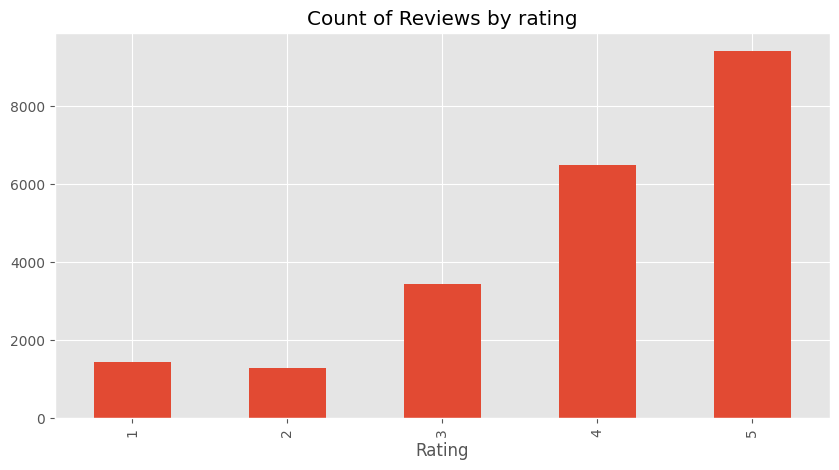

In [9]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by rating',
          figsize=(10, 5))
ax.set_xlabel('Rating')
plt.show()

In [10]:
example = df['comment_content'][60]
print(example)

We booked room without window, the room is small but it's quite comfortable. The desk lamp is placed right above the bed si it's quite hard to sit on the bed while leaning our back to the wall.   The location is only 3 mins walk from bras basah MRT station and very near to Bugis area. The staff also very nice and helpfull.


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['We',
 'booked',
 'room',
 'without',
 'window',
 ',',
 'the',
 'room',
 'is',
 'small']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('We', 'PRP'),
 ('booked', 'VBD'),
 ('room', 'NN'),
 ('without', 'IN'),
 ('window', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('room', 'NN'),
 ('is', 'VBZ'),
 ('small', 'JJ')]

https://www.guru99.com/pos-tagging-chunking-nltk.html

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  booked/VBD
  room/NN
  without/IN
  window/NN
  ,/,
  the/DT
  room/NN
  is/VBZ
  small/JJ
  but/CC
  it/PRP
  's/VBZ
  quite/RB
  comfortable/JJ
  ./.
  The/DT
  desk/NN
  lamp/NN
  is/VBZ
  placed/VBN
  right/RB
  above/IN
  the/DT
  bed/NN
  si/VBD
  it/PRP
  's/VBZ
  quite/RB
  hard/JJ
  to/TO
  sit/VB
  on/IN
  the/DT
  bed/NN
  while/IN
  leaning/VBG
  our/PRP$
  back/NN
  to/TO
  the/DT
  wall/NN
  ./.
  The/DT
  location/NN
  is/VBZ
  only/RB
  3/CD
  mins/NNS
  walk/VBP
  from/IN
  bras/NNS
  basah/JJ
  (ORGANIZATION MRT/NNP)
  station/NN
  and/CC
  very/RB
  near/IN
  to/TO
  (GPE Bugis/NNP)
  area/NN
  ./.
  The/DT
  staff/NN
  also/RB
  very/RB
  nice/JJ
  and/CC
  helpfull/NN
  ./.)


# VADER

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.842, 'pos': 0.129, 'compound': 0.8397}

In [16]:
# Run the polarity score on the entire dataset
res = {}
for i, row in df.iterrows():
    text = row['comment_content']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [18]:
vaders

,index,neg,neu,pos,compound,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know
0,0,0.000,0.752,0.248,0.9644,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",5,Best Among the Budget-friendly Hotels in SG,I love this hotel! Its in a quiet and peaceful...,Date of stay: July 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']"
1,1,0.080,0.718,0.202,0.6801,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",4,Good Location for Travel around Singapore Center,"Convenience near MRT Station and Bus Stops, Le...",Date of stay: June 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']"
2,2,0.000,0.812,0.188,0.9909,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",4,I guess I'm one of the lucky ones!,"After seeing some of these reviews, I was some...",Date of stay: February 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']"
3,3,0.156,0.801,0.044,-0.8305,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",1,Hotel to avoid for SLEEPLESS nights !,"in Jan, 2023, I stayed for 2 nights @ Budget O...",Date of stay: January 2023,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']"
4,4,0.135,0.711,0.154,0.4588,Oxford Hotel,178 reviews,2.5,"[3.9, 2.5, 2.6, 2.2]",2,Not a good place if you need to work,For such a high cost you'd expect functional W...,Date of stay: November 2022,3.0 of 5 stars,"['', 'English, Chinese, Filipino, Malay']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22004,22004,0.017,0.801,0.182,0.9747,Spacepod@SG,20 reviews,3.5,"[1.0, 3.0, 3.0]",5,Easy comfortable cheap,I booked with this place to experience a capsu...,Date of stay: June 2019,2.0 of 5 stars,"['', 'Budget', 'English, Chinese']"
22005,22005,0.000,0.734,0.266,0.9635,Spacepod@SG,20 reviews,3.5,"[1.0, 3.0, 3.0]",5,Awesome place to stay!,It's my first time to stay in capsule hotel an...,Date of stay: November 2018,2.0 of 5 stars,"['', 'Budget', 'English, Chinese']"
22006,22006,0.000,0.638,0.362,0.9876,Spacepod@SG,20 reviews,3.5,"[1.0, 3.0, 3.0]",5,Worth every pennies,The receptionist ladies (Rachel and Joey) were...,Date of stay: November 2018,2.0 of 5 stars,"['', 'Budget', 'English, Chinese']"
22007,22007,0.047,0.727,0.227,0.9756,Spacepod@SG,20 reviews,3.5,"[1.0, 3.0, 3.0]",3,Unique yet weird place to stay,Okay. What was my consideration to stay here? ...,Date of stay: October 2018,2.0 of 5 stars,"['', 'Budget', 'English, Chinese']"


# vader reusults

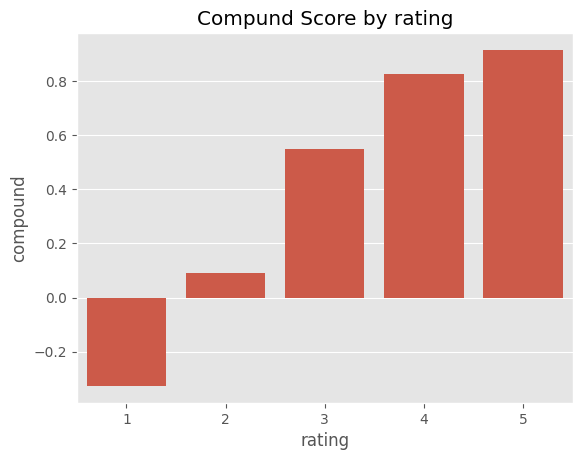

In [19]:
ax = sns.barplot(data=vaders, x='rating', y='compound', errorbar=None)
ax.set_title('Compund Score by rating')
plt.show()

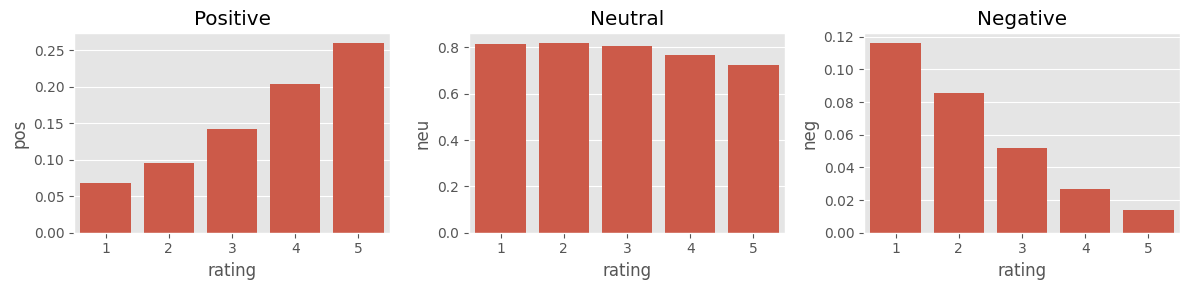

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0], errorbar=None)
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1], errorbar=None)
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2], errorbar=None)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

this shows that vader is valuble in having this connection betwwen the sentiment score of the text and the rating

# however, vader does not pick up on sarcasm, we have transformer deep learning models that can pick up those context

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER 
print(example)
sia.polarity_scores(example)

In [ ]:
# Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}

for i, row in df.iterrows():
    try:
        text = row['comment_content']
        
        # Perform VADER sentiment analysis
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        
        # Perform sentiment analysis using 'polarity_scores_roberta' function
        # You should define this function separately if you haven't already
        roberta_result = polarity_scores_roberta(text) 
        
        # Combine the results from both methods into one dictionary
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for id {i}')

# Display the results
print(res)

In [ ]:
df.iloc[[162]]

In [ ]:
pd.set_option('display.max_colwidth', None)